In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def load_dataset():
    dataset = h5py.File('cats_dogs_128.h5', "r")
    train_set_x_orig = np.array(dataset["train_img"][:]) 
    train_set_y_orig = np.array(dataset["train_labels"][:]) 

    test_set_x_orig = np.array(dataset["test_img"][:])
    test_set_y_orig = np.array(dataset["test_labels"][:]) 

    #classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig



In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()

y = [1]


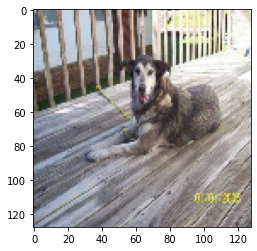

In [4]:
index = 14304
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]))

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 20000
Number of testing examples: m_test = 5000
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (20000, 128, 128, 3)
train_set_y shape: (1, 20000)
test_set_x shape: (5000, 128, 128, 3)
test_set_y shape: (1, 5000)


In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (49152, 20000)
train_set_y shape: (1, 20000)
test_set_x_flatten shape: (49152, 5000)
test_set_y shape: (1, 5000)


In [7]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [8]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))   
    return s

In [9]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [10]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    
    A = sigmoid((np.dot(w.T, X) + b))
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [22]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 500 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [23]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid((np.dot(w.T, X) + b))
    
    
    for i in range(A.shape[1]):

        Y_prediction = A > 0.5
        
    
    return Y_prediction

In [24]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=500, learning_rate=0.1, print_cost=False):
    
    w, b = initialize_with_zeros(X_train.shape[0])

    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = params["w"]
    b = params["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [25]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=10000, learning_rate=0.0008, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 500: 0.631924
Cost after iteration 1000: 0.624874
Cost after iteration 1500: 0.619766
Cost after iteration 2000: 0.615524
Cost after iteration 2500: 0.611862
Cost after iteration 3000: 0.608631
Cost after iteration 3500: 0.605734
Cost after iteration 4000: 0.603102
Cost after iteration 4500: 0.600684
Cost after iteration 5000: 0.598441
Cost after iteration 5500: 0.596344
Cost after iteration 6000: 0.594370
Cost after iteration 6500: 0.592500
Cost after iteration 7000: 0.590721
Cost after iteration 7500: 0.589020
Cost after iteration 8000: 0.587387
Cost after iteration 8500: 0.585814
Cost after iteration 9000: 0.584296
Cost after iteration 9500: 0.582825
train accuracy: -5973.67 %
test accuracy: -17653.100000000002 %


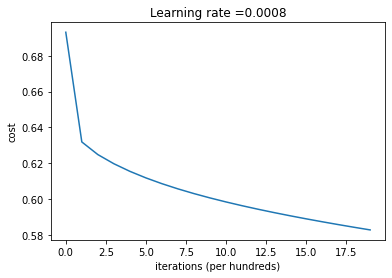

In [26]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In [38]:
def classify_image(my_image):
    fname = "images/" + my_image
    image = np.array(Image.open(fname).resize((num_px, num_px)))
    plt.imshow(image)
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T
    my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
    pred_yhat = int(np.squeeze(my_predicted_image))
    animal = "cat" if pred_yhat == 0 else "dog"

    print("y = " + str(pred_yhat))
    print("animal = " + animal)

y = 1
animal = dog


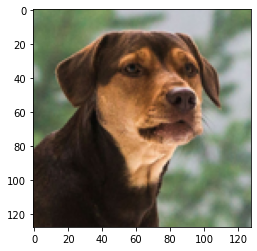

In [39]:
classify_image("dog1.jpg")

y = 0
animal = cat


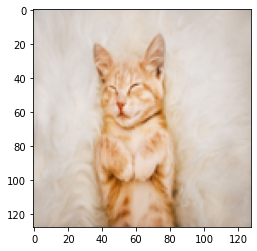

In [42]:
classify_image("cat3.jpg")